# Testing pyBOAT package for signals analysis

In [1]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyboat import WAnalyzer
import statsmodels.stats.multitest as multi
from CosinorPy import file_parser, cosinor, cosinor1

Unable to determine R home: [WinError 2] Le fichier spécifié est introuvable
Unable to determine R library path: Command '('C:\\Program Files\\R\\R-4.1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


In [ ]:
def analysis(filename,lines=[0],dt=2):
        df =pd.read_csv(filename,index_col=0)
        filename=filename.split('/')[-1][:-4]
        print(filename)
        ridge=pd.DataFrame()
        if lines == 'all':
            lines = range(len(df))
        if type(lines) == int:
            lines = [lines]  
        if dt==None:
            dt = int(df.columns[0]) - int(df.columns[1])
            print(dt)
        for x in lines:
                signal = df.iloc[x].to_list()
                t = df.columns.astype(int).to_list()
                periods = t
                wAn= WAnalyzer(periods=periods,dt=dt, time_unit_label='hours')
                plt.ion()
                T_cutoff = 96 # Define cutoff period in h
                modulus, ransform = wAn.compute_spectrum(signal,T_c=T_cutoff)
                ridge_tmp = wAn.get_maxRidge()
                ridge = pd.concat([ridge,ridge_tmp])
                plt.savefig(f"Out/{filename}/plt_line{x}_{filename}.png",facecolor='white')
        ridge.to_csv(f"Out/{filename}/ridge_{filename}.csv")
        return ridge

In [ ]:
for i in [1,2,3]:
    for j in [1,2,3]:
        FILENAME=f"c{i}_n0{3*j}.csv"
        folder_in = f'Out/{FILENAME[:-4]}/'
        df = pd.read_csv(folder_in+FILENAME,index_col=0)
        rda.analysis(df,FILENAME,lines=0)
df

# Detrending test

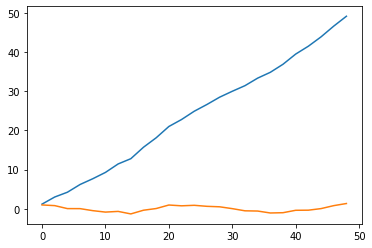

In [3]:
from scipy.signal import detrend
import numpy as np
FILENAME=f"c1_n03_t0.csv"
folder_in = f'Out/{FILENAME[:-4]}/'
df = pd.read_csv(folder_in+FILENAME,index_col=0)
x=df.columns.to_numpy().astype(float)
y=df.iloc[0]+ x
plt.plot(x,y)
plt.plot(x,detrend(y))

In [ ]:
def plot_detrend(x,y,deg=[1,2,3,5]):
    if type(deg)!=list:
        deg=[deg]
    for deg_val in deg:
        model= np.polyfit(x,y,deg_val)
        predicted = np.polyval(model, x)
        yp=y - predicted
        plt.plot(x, y,'r')
        plt.plot(x, predicted,'b')
        plt.plot(x, yp,'g')
        plt.title(f'Detrended Residual deg={deg_val}')
        plt.show()
def detrend(x,y,deg):  
    model= np.polyfit(x,y,deg)
    predicted = np.polyval(model, x)
    yp=y - predicted
    print(f'Detrended Residual deg={deg}')
    return yp


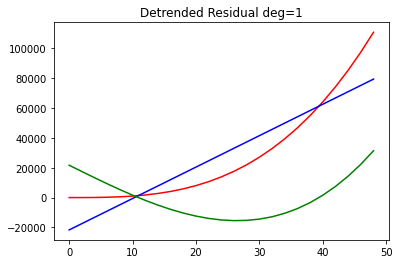

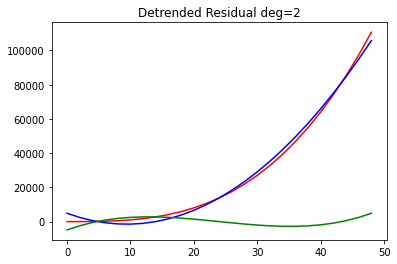

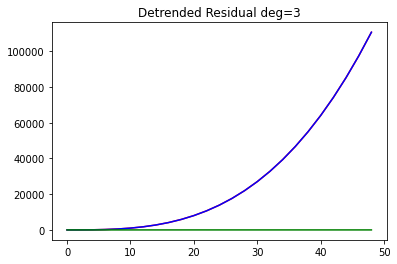

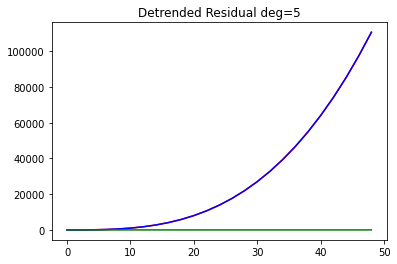

Detrended Residual deg=1


0     21639.364225
2     17443.993971
4     13296.032533
6      9244.825148
8      5337.109132
10     1621.541557
12    -1853.482237
14    -5041.323962
16    -7891.579765
18   -10358.349758
20   -12392.651203
22   -13948.054908
24   -14975.124708
26   -15426.584874
28   -15253.906374
30   -14409.576111
32   -12845.330553
34   -10512.590210
36    -7364.284904
38    -3351.414066
40     1574.002955
42     7458.829132
44    14352.033444
46    22301.590481
48    31354.931055
Name: 0, dtype: float64

In [4]:
y2=y+x**3
rda.plot_detrend(x,y2)
rda.detrend(x,y2,1)